In [91]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [93]:
# set configurations
sample_size = 500
nr_sample_sets = 20
num_steps = 200
x_b = np.linspace(0,1,num_steps)

n_folds = 5
test_size = 0.2

### Bounded distributions

In [96]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample_sets, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [99]:
x_b = np.linspace(0,1,num_steps)
kde_df = dem.get_kde(bounded_samples, x_b)
kde_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,0.952978,1.013484,1.073973,1.134087,1.193468,1.251766,1.308639,1.363762,1.416828,1.467555,...,0.081437,0.074797,0.068518,0.062600,0.057039,0.051829,0.046964,0.042435,0.038231,beta_1_2
1,0.974242,1.029079,1.083182,1.136221,1.187877,1.237849,1.285855,1.331642,1.374980,1.415675,...,0.086921,0.080055,0.073488,0.067232,0.061299,0.055695,0.050424,0.045487,0.040884,beta_1_2
2,1.033059,1.089643,1.145279,1.199623,1.252346,1.303141,1.351729,1.397864,1.441332,1.481958,...,0.127731,0.120756,0.113896,0.107161,0.100564,0.094121,0.087844,0.081747,0.075844,beta_1_2


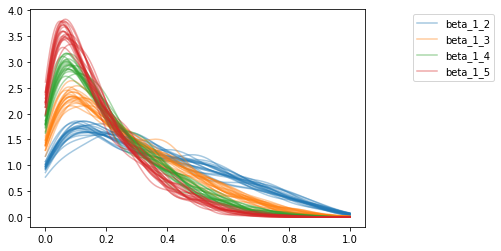

In [100]:
dem.get_kde_plot(kde_df,x_b)

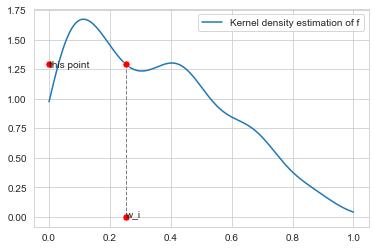

In [223]:
a = kde_df.iloc[1]
y = list(a[:-1])
x = list(np.linspace(0,1,200))
sns.lineplot(x=x, y=y)

highlight_index = 50  # Index of the point to highlight
highlight_x = x[highlight_index]
highlight_y = y[highlight_index]
sns.scatterplot(x=[highlight_x], y=[highlight_y], color='red', s=50, zorder=10)
sns.scatterplot(x=[highlight_x], y=0, color='red', s=50, zorder=10)
plt.plot([highlight_x, highlight_x], [highlight_y, 0], color='grey', linestyle='--', linewidth=1)

plt.text(0, highlight_y, f'this point', ha='left', va='center_baseline', zorder=10)
plt.text(highlight_x, 0, f'w_i', ha='left', va='baseline', zorder=10)

sns.scatterplot(x=0, y=[highlight_y], color='red', s=50, zorder=10)
#plt.plot([highlight_x, 0], [highlight_y, highlight_y], color='grey', linestyle='--', linewidth=1)
plt.legend(['Kernel density estimation of f'])

plt.show()

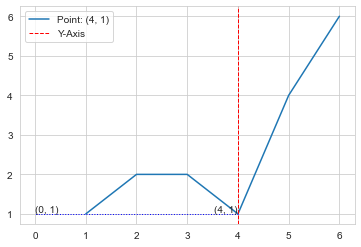

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6]
y = [1, 2, 2, 1, 4, 6]

sns.set_style("whitegrid")

# Plot the line
sns.lineplot(x=x, y=y)

# Highlight the point
highlight_index = 3  # Index of the point to highlight
highlight_x = x[highlight_index]
highlight_y = y[highlight_index]

plt.axvline(x=highlight_x, color='red', linestyle='--', linewidth=1)

# Draw a line between the point and the y-axis
plt.plot([highlight_x, 0], [highlight_y, highlight_y], color='blue', linestyle=':', linewidth=1)

# Add legend
plt.legend(labels=[f'Point: ({highlight_x}, {highlight_y})', 'Y-Axis'])

# Add point names
plt.text(highlight_x, highlight_y, f'({highlight_x}, {highlight_y})', ha='right', va='bottom')
plt.text(0, highlight_y, f'(0, {highlight_y})', ha='left', va='bottom')

plt.show()


In [136]:
x

[0.0,
 0.005025125628140704,
 0.010050251256281407,
 0.01507537688442211,
 0.020100502512562814,
 0.02512562814070352,
 0.03015075376884422,
 0.035175879396984924,
 0.04020100502512563,
 0.04522613065326633,
 0.05025125628140704,
 0.05527638190954774,
 0.06030150753768844,
 0.06532663316582915,
 0.07035175879396985,
 0.07537688442211056,
 0.08040201005025126,
 0.08542713567839195,
 0.09045226130653267,
 0.09547738693467336,
 0.10050251256281408,
 0.10552763819095477,
 0.11055276381909548,
 0.11557788944723618,
 0.12060301507537688,
 0.12562814070351758,
 0.1306532663316583,
 0.135678391959799,
 0.1407035175879397,
 0.1457286432160804,
 0.15075376884422112,
 0.15577889447236182,
 0.16080402010050251,
 0.1658291457286432,
 0.1708542713567839,
 0.17587939698492464,
 0.18090452261306533,
 0.18592964824120603,
 0.19095477386934673,
 0.19597989949748745,
 0.20100502512562815,
 0.20603015075376885,
 0.21105527638190955,
 0.21608040201005024,
 0.22110552763819097,
 0.22613065326633167,
 0.2311

In [32]:
bounded_samples_st = dm.get_st_samples(bounded_dists, nr_sample_sets, sample_size)
min_ = np.percentile(bounded_samples_st.iloc[:,:-1],2.5)
max_ = np.percentile(bounded_samples_st.iloc[:,:-1],97.5)
x_b_st = np.linspace(min_, max_, num_steps)
kde_df = dem.get_kde(bounded_samples_st, x_b_st)
kde_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,0.309849,0.320095,0.329994,0.339510,0.348613,0.357271,0.365462,0.373162,0.380355,0.387027,...,0.075682,0.074024,0.072321,0.070577,0.068794,0.066973,0.065117,0.063231,0.061317,beta_1_2
1,0.331638,0.339376,0.346624,0.353366,0.359589,0.365285,0.370450,0.375084,0.379187,0.382768,...,0.061388,0.059566,0.057757,0.055955,0.054159,0.052368,0.050580,0.048794,0.047011,beta_1_2
2,0.314500,0.324382,0.333826,0.342800,0.351277,0.359235,0.366657,0.373531,0.379852,0.385617,...,0.070187,0.068531,0.066879,0.065232,0.063589,0.061952,0.060320,0.058694,0.057074,beta_1_2


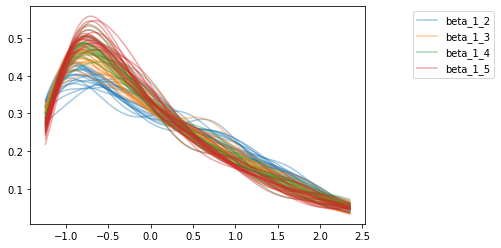

In [33]:
dem.get_kde_plot(kde_df,x_b_st)

### SVM

In [59]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
num_steps_list = list(np.arange(1,21))

In [66]:
res_svm = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample_sets, n_folds, test_size, 'kde', 1)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

In [17]:
res_svm.to_csv('results/kde/res_svm_bounded.csv')

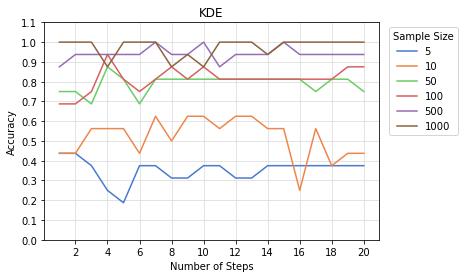

In [67]:
cm.plot_cv_numsteps_samplesize(res_svm,'KDE')

### Logistic Regression

In [71]:
res_lr = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample_sets, n_folds, test_size, 'kde', 2)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

In [17]:
res_lr.to_csv('results/kde/res_lr_bounded.csv')

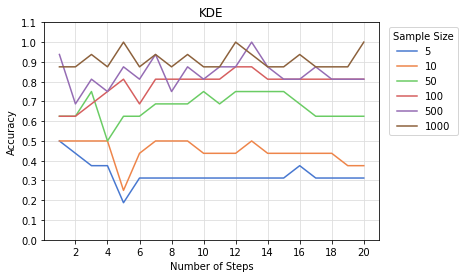

In [72]:
cm.plot_cv_numsteps_samplesize(res_lr,'KDE')

### Heavytail distributions

In [45]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample_sets, sample_size, transform=False)
heavytail_samples_st = dm.get_st_samples(heavytail_dists, nr_sample_sets, sample_size, transform=False)
#dm.plot_histograms_of_samples(heavytail_samples)

In [55]:
perc_95 = np.percentile(heavytail_samples.iloc[:,:-1],97.5)
x_h = np.linspace(0,perc_95,num_steps)
kde_df = dem.get_kde(heavytail_samples, x_h)
kde_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,0.127659,0.129833,0.131817,0.133600,0.135176,0.136538,0.137681,0.138600,0.139293,0.139758,...,0.001653,0.001625,0.001596,0.001566,0.001536,0.001505,0.001474,0.001442,0.001411,cauchy
1,0.042466,0.042556,0.042639,0.042717,0.042790,0.042856,0.042916,0.042970,0.043019,0.043061,...,0.006297,0.006176,0.006056,0.005939,0.005824,0.005711,0.005600,0.005490,0.005383,cauchy
2,0.089789,0.090591,0.091330,0.092006,0.092617,0.093161,0.093637,0.094046,0.094386,0.094656,...,0.002153,0.002146,0.002138,0.002131,0.002124,0.002116,0.002108,0.002100,0.002092,cauchy


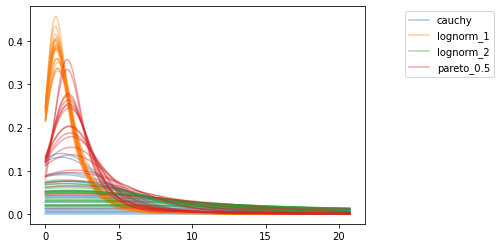

In [56]:
dem.get_kde_plot(kde_df,x_h)

### SVM

In [22]:
res_svm_ht = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, n_folds, 'kde', 1, transform=True)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

In [23]:
res_svm_ht.to_csv('results/kde/res_svm_heavytail.csv')

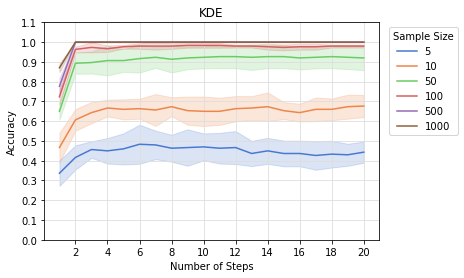

In [26]:
cm.plot_cv_numsteps_samplesize(res_svm_ht,'KDE')

### Logististic Regression

In [28]:
res_lr_ht = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, heavytail_dists, nr_sample, n_folds, 'kde', 2, transform = True)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

In [38]:
res_lr_ht.to_csv('results/kde/res_lr_heavytail.csv')

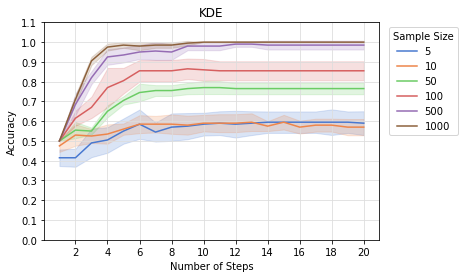

In [29]:
cm.plot_cv_numsteps_samplesize(res_lr_ht,'KDE')